In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# load data
train_data = pd.read_json('./input/train.json')

im1 = np.array([b for b in train_data['band_1']])
im2 = np.array([b for b in train_data['band_2']])

In [3]:
# Normalize Data
im1_mean = np.mean(im1, axis=0)
im1_std = np.std(im1, axis=0)
im2_mean = np.mean(im2, axis=0)
im2_std = np.std(im2, axis=0)

im1_nor = (im1 - im1_mean) / im1_std
im2_nor = (im2 - im2_mean) / im2_std

In [4]:
# svd
U1, s1, V1 = np.linalg.svd(im1_nor, full_matrices=0)
U2, s2, V2 = np.linalg.svd(im2_nor, full_matrices=0)


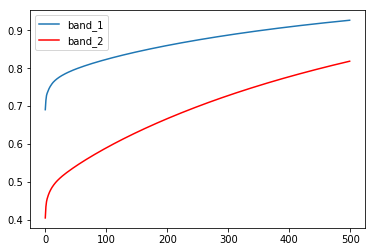

In [5]:
# fraction of variance explained in the first 500 modes of train data.
plt.figure()

frac1 = np.cumsum(s1**2) / np.sum(s1**2)
frac2 = np.cumsum(s2**2) / np.sum(s2**2)

plt.plot(frac1[:500])
plt.plot(frac2[:500],'r')
plt.legend(['band_1', 'band_2'])
plt.show()

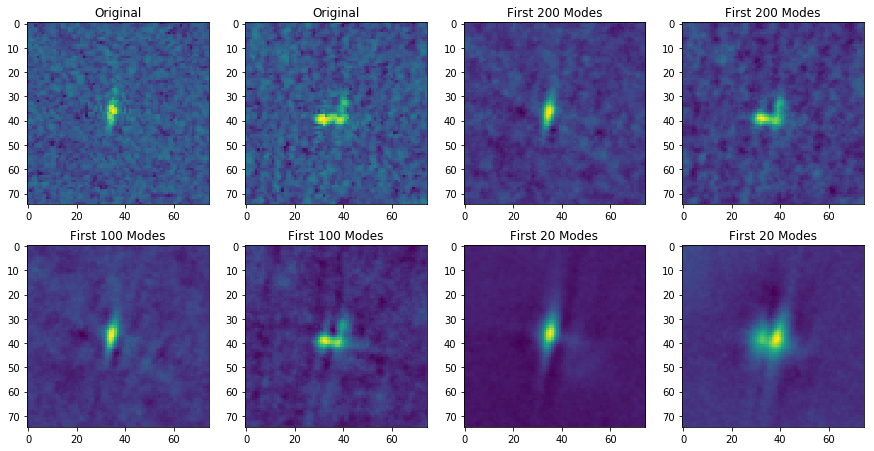

In [20]:
# original 
fig = plt.figure(1, figsize=(15, 15))
for i in range(2):
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_title('Original')
    arr = np.reshape(im1[i, :], (75, 75))
    ax.imshow(arr)

# first 200 modes
nmodes = 200
im1p = np.dot(np.dot(U1[:, :nmodes], np.diag(s1[:nmodes])), V1[:nmodes, ])
im2p = np.dot(np.dot(U2[:, :nmodes], np.diag(s2[:nmodes])), V2[:nmodes, ])

for i in range(2):
    ax = fig.add_subplot(2, 4, i + 3)
    ax.set_title('First 200 Modes')
    arr = im1p[i, :] * im1_std + im1_mean
    arr = np.reshape(arr, (75, 75))
    ax.imshow(arr)

# first 100 modes
nmodes = 100
im1p = np.dot(np.dot(U1[:, :nmodes], np.diag(s1[:nmodes])), V1[:nmodes, ])
im2p = np.dot(np.dot(U2[:, :nmodes], np.diag(s2[:nmodes])), V2[:nmodes, ])

for i in range(2):
    ax = fig.add_subplot(3, 4, i + 5)
    ax.set_title('First 100 Modes')
    arr = im1p[i, :] * im1_std + im1_mean
    arr = np.reshape(arr, (75, 75))
    ax.imshow(arr)

# first 20 modes
nmodes = 20
im1p = np.dot(np.dot(U1[:, :nmodes], np.diag(s1[:nmodes])), V1[:nmodes, ])
im2p = np.dot(np.dot(U2[:, :nmodes], np.diag(s2[:nmodes])), V2[:nmodes, ])

for i in range(2):
    ax = fig.add_subplot(3, 4, i + 7)
    ax.set_title('First 20 Modes')
    arr = im1p[i, :] * im1_std + im1_mean
    arr = np.reshape(arr, (75, 75))
    ax.imshow(arr)
plt.show()


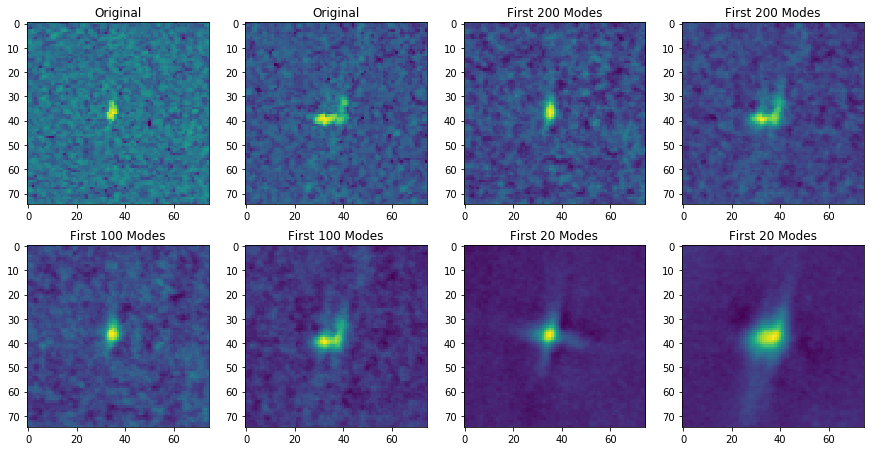

In [19]:
# original 
fig = plt.figure(1, figsize=(15, 15))
for i in range(2):
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_title('Original')
    arr = np.reshape(im2[i, :], (75, 75))
    ax.imshow(arr)

# first 200 modes
nmodes = 200
im1p = np.dot(np.dot(U1[:, :nmodes], np.diag(s1[:nmodes])), V1[:nmodes, ])
im2p = np.dot(np.dot(U2[:, :nmodes], np.diag(s2[:nmodes])), V2[:nmodes, ])

for i in range(2):
    ax = fig.add_subplot(2, 4, i + 3)
    ax.set_title('First 200 Modes')
    arr = im2p[i, :] * im2_std + im2_mean
    arr = np.reshape(arr, (75, 75))
    ax.imshow(arr)

# first 100 modes
nmodes = 100
im1p = np.dot(np.dot(U1[:, :nmodes], np.diag(s1[:nmodes])), V1[:nmodes, ])
im2p = np.dot(np.dot(U2[:, :nmodes], np.diag(s2[:nmodes])), V2[:nmodes, ])

for i in range(2):
    ax = fig.add_subplot(3, 4, i + 5)
    ax.set_title('First 100 Modes')
    arr = im2p[i, :] * im2_std + im2_mean
    arr = np.reshape(arr, (75, 75))
    ax.imshow(arr)

# first 20 modes
nmodes = 20
im1p = np.dot(np.dot(U1[:, :nmodes], np.diag(s1[:nmodes])), V1[:nmodes, ])
im2p = np.dot(np.dot(U2[:, :nmodes], np.diag(s2[:nmodes])), V2[:nmodes, ])

for i in range(2):
    ax = fig.add_subplot(3, 4, i + 7)
    ax.set_title('First 20 Modes')
    arr = im2p[i, :] * im2_std + im2_mean
    arr = np.reshape(arr, (75, 75))
    ax.imshow(arr)
plt.show()
